In [8]:
from google.colab import files
upload = files.upload()

Saving Customer Churn.csv to Customer Churn.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Customer Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Replacing script help to change the datatype. If any datasets are automatically in other datatype. You can easily replace their type

In [14]:
df ['TotalCharges'] = df['TotalCharges'].replace(' ',0).astype('float')

# Duplicate value help to find the duplicate

In [16]:
df.duplicated().sum()

0

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [17]:
def senior_citizen(number):
  if number == 1:
    return 'Yes'
  else:
    return 'No'

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(senior_citizen)
print(df['SeniorCitizen'])

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


# Count the churn Yes and No Value

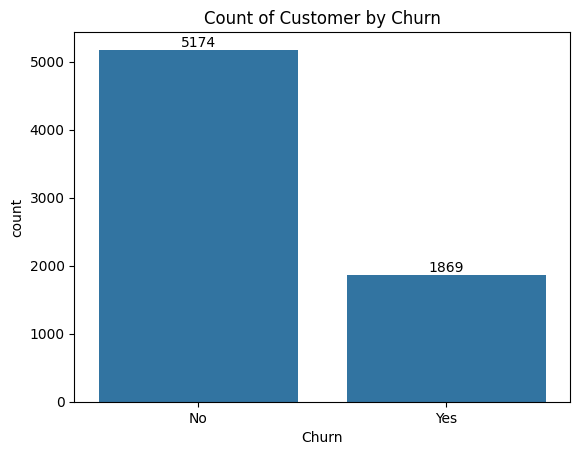

In [19]:
ax = sns.countplot(data = df, x ='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

# Yes nd No data showing the result of senior citizen by churn

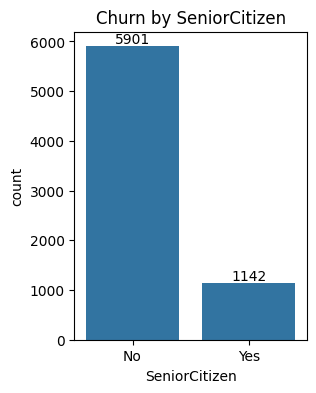

In [20]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

# from the given pie chart we can conclude that 26.54% of our customers have churned out.

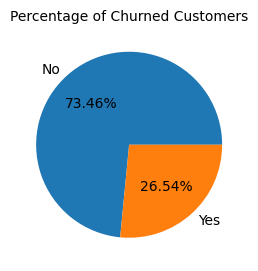

In [21]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10 )
plt.show()

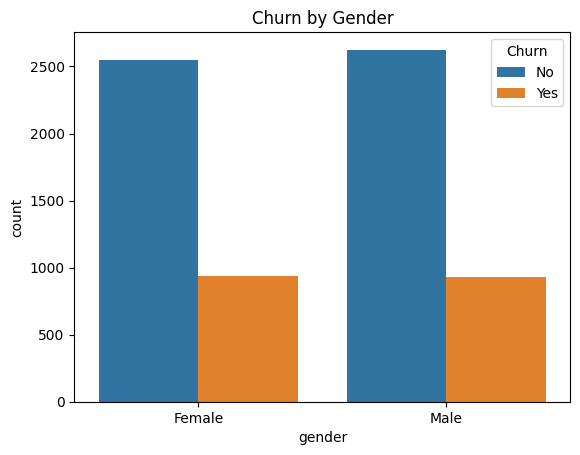

In [22]:
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

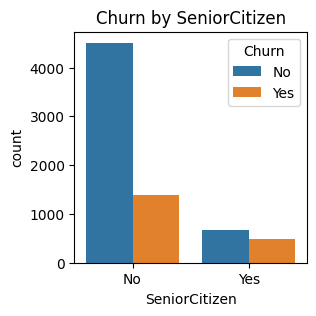

In [23]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

# I want to create a stack bar chart which give me labels as % to total.Comparative a greater percentage of people in senior citizen category have churned. Calculate percentages


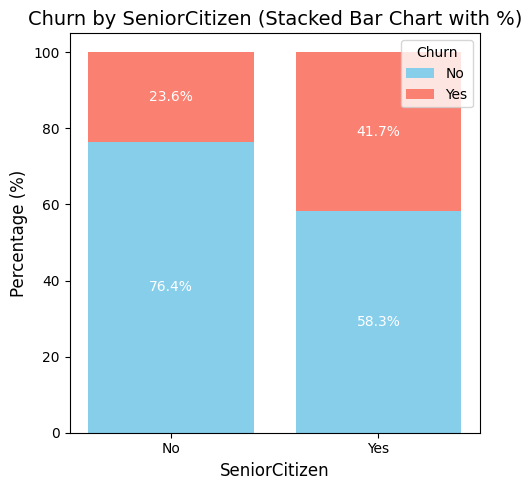

In [24]:

# Calculate the percentage
percentages = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)
percentages = percentages.div(percentages.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))

bottom = None
colors = ["skyblue", "salmon"]  # Define colors for each bar segment
for churn_status, color in zip(percentages.columns, colors):
    ax.bar(
        percentages.index,
        percentages[churn_status],
        bottom=bottom,
        label=churn_status,
        color=color,
    )
    bottom = (
        percentages[churn_status]
        if bottom is None
        else bottom + percentages[churn_status]
    )

# Add percentage labels
for i, senior_citizen in enumerate(percentages.index):
    cumulative = 0
    for churn_status in percentages.columns:
        value = percentages.loc[senior_citizen, churn_status]
        ax.text(
            i,
            cumulative + value / 2,
            f"{value:.1f}%",
            ha="center",
            va="center",
            fontsize=10,
            color="white" if value > 15 else "black",  # Adjust label color for contrast
        )
        cumulative += value

# Customize the chart
ax.set_title("Churn by SeniorCitizen (Stacked Bar Chart with %)", fontsize=14)
ax.set_xlabel("SeniorCitizen", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_xticks(percentages.index)
ax.set_xticklabels(["No", "Yes"])
ax.legend(title="Churn", fontsize=10)

plt.tight_layout()
plt.show()

# People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

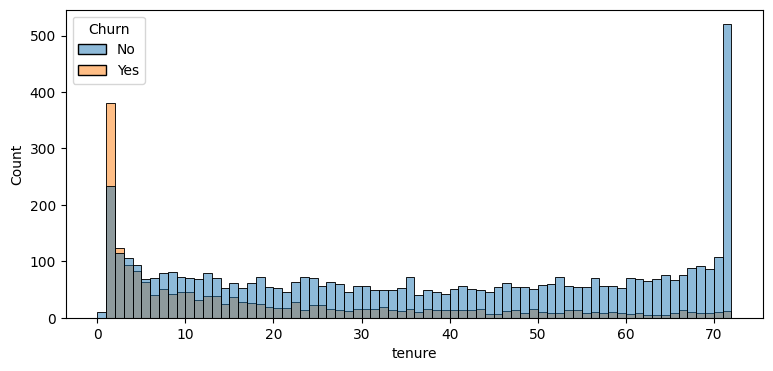

In [32]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years on contract

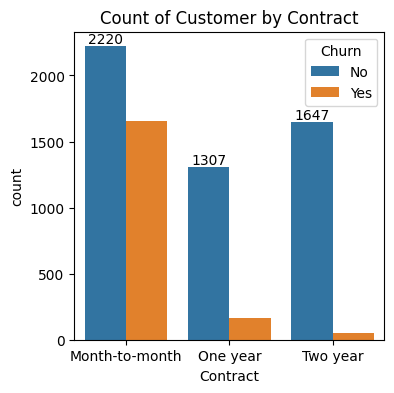

In [34]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

# While using this scripting you can used to search column name data

In [35]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# The Majority of customers who do not churn tend to have a services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

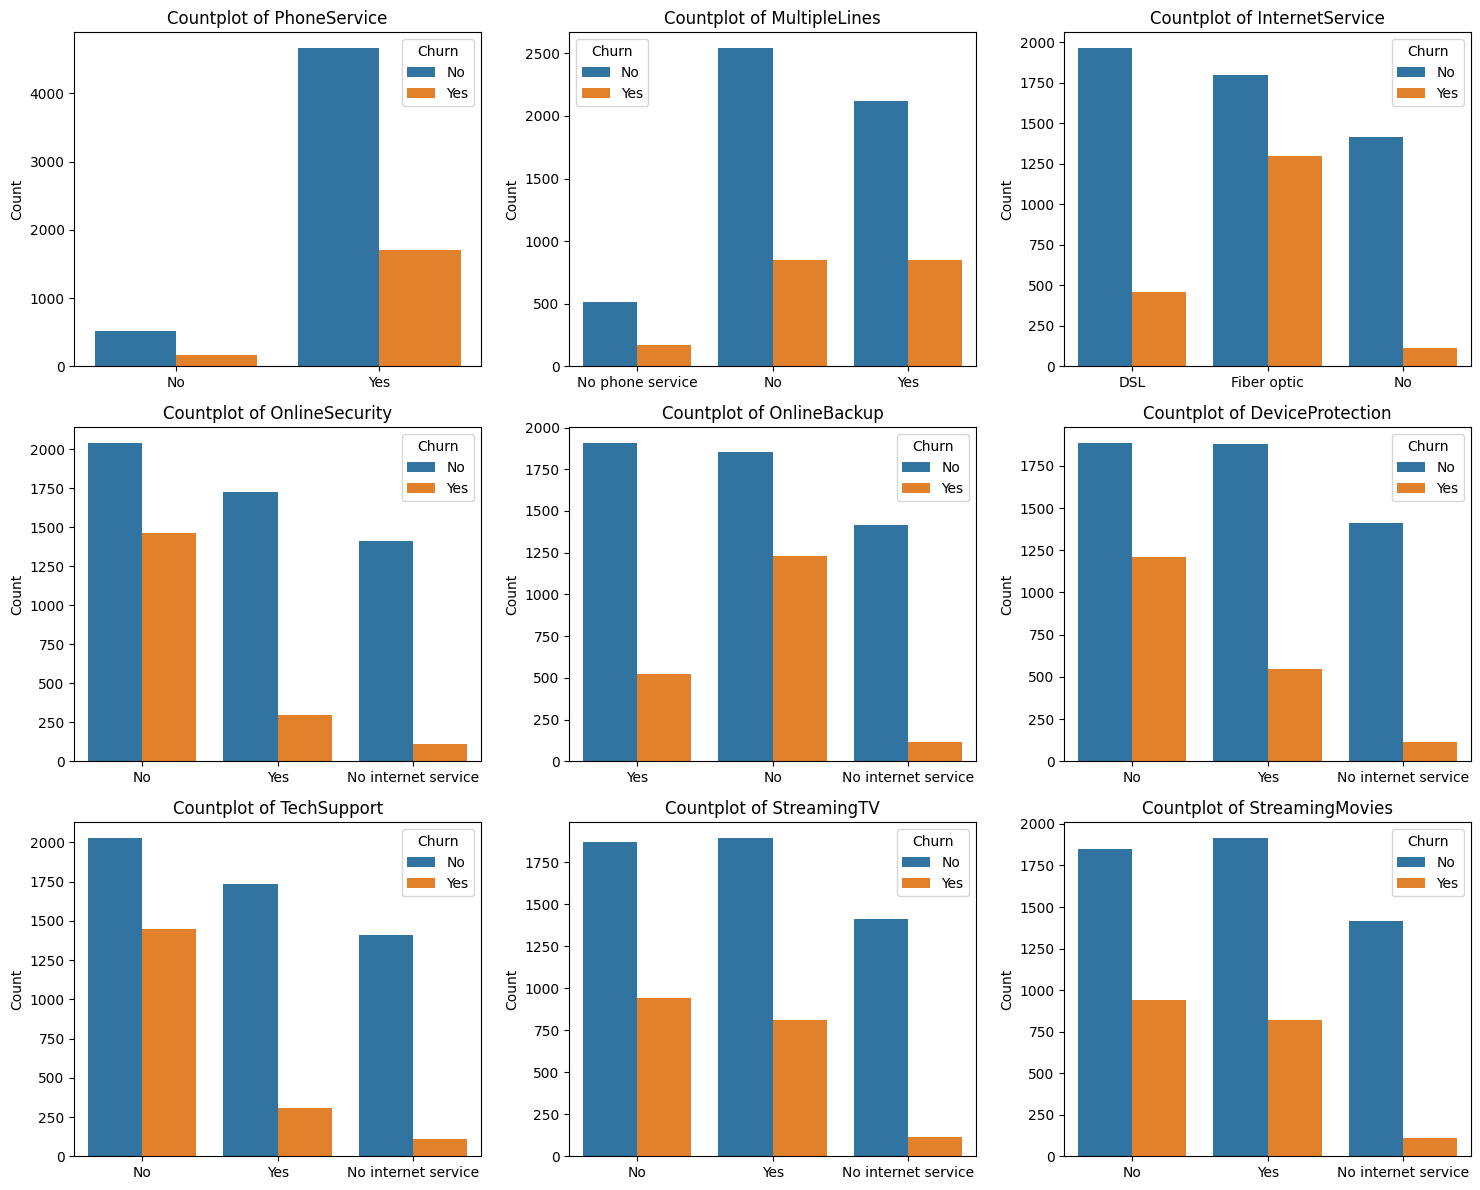

In [38]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of rows and columns for subplots
n_cols = 3  # Number of subplots per row
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each countplot
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue = 'Churn')
    axes[i].set_title(f"Countplot of {column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Customer is likely to churn when he is using electronic check as a payment method

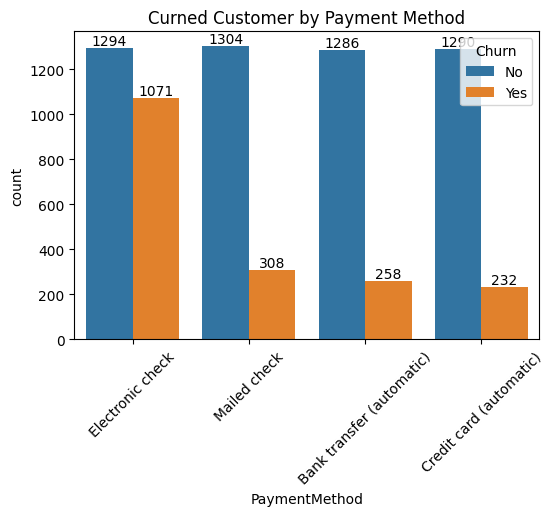

In [43]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Curned Customer by Payment Method")
plt.show()